# Titanic - Machine Learning from Disaster

# Context

This notebook is part of Titanic - Machine Learning from Disaster Kaggle's competition. Here you will find exploratory data analysis and its conclusions and several classification models such as decision trees, random forest, and AdaBoost. 

[Here](https://www.kaggle.com/competitions/titanic) you can find the Titanic dataset on Kaggle.

All the code was written in Python 3, using Jupyter Notebooks.

In [1]:
# Importing libraries

import itertools
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit,\
                                    train_test_split
from sklearn.preprocessing import StandardScaler

from utils.plotting import plot_confusion_matrix
from utils.model import run_model
from utils.score import validation_scores


# Exploratory analysis

Let's check the main characteristics and features of the dataset.

In [2]:
# Loading data

df_train = pd.read_csv("c:\kaggle_titanic_train.csv")
df_test = pd.read_csv("c:\kaggle_titanic_test.csv")

In [3]:
# Displaying the first 5 rows

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check datasets size

print("train dataset ", df_train.shape)
print("test dataset ", df_test.shape)

train dataset  (891, 12)
test dataset  (418, 11)


In [5]:
# Check data types

df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# Counting the number of missing values for the training set

df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Counting the number of missing values for the test set

df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are missing values for 3 columns of the training set:
-  Age: in the early 20th century, it was not common to register a baby's date of birth as it is nowadays. Yet, the low-class tickets did not require identification to board.
- Cabin: Most of the passengers bought cheap third-class tickets. They were housed in shared unnumbered cabins with other 10 people, usually.
- Embarked: There are two missing values for the passenger's embark.

For the test set, there are several null age values and only one in the "Fare" feature. For both, we are filling them with the median Age and Fare respectively.

In [8]:
# Filling NAN records with the median age and Fare

df_test["Fare"] = df_test["Fare"].fillna((df_test["Fare"].median()))   
df_test["Age"] = df_test["Age"].fillna((df_test["Age"].median()))

Let's dive deep into the numerical features and how they relate to the outcome, i.e. Survived column.

In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0, 0.5, 'Percentage')

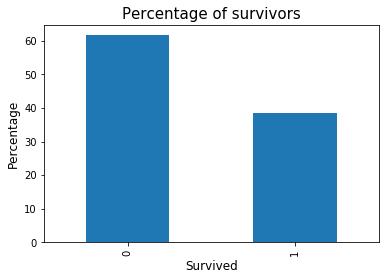

In [10]:
# Plotting the number of survivors

(df_train["Survived"].value_counts(normalize=True)*100).plot(kind="bar")
plt.title("Percentage of survivors", fontsize=15)
plt.xlabel("Survived", fontsize=12)
plt.ylabel("Percentage", fontsize=12)

In [11]:
# Converting Pclass into string

df_train["Pclass"] = df_train["Pclass"].astype("str")

Text(0.5, 1.0, 'Survivors by place of boarding')

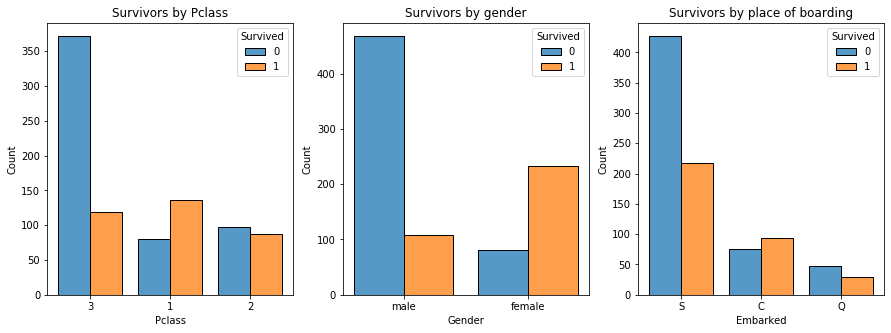

In [12]:
# Plotting number of survivors by Pclass, sex and place of boarding

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5))

sns.histplot(x="Pclass",  hue = "Survived", multiple = "dodge", shrink=0.8, data=df_train, ax=ax1)
ax1.set_title("Survivors by Pclass")

sns.histplot(x="Sex",  hue = "Survived", multiple = "dodge", shrink=0.8, data=df_train, ax=ax2)
ax2.set_title("Survivors by gender")
ax2.set_xlabel("Gender")

sns.histplot(x="Embarked", hue="Survived", multiple="dodge", shrink=0.8, data=df_train, ax=ax3)
ax3.set_title("Survivors by place of boarding")

Text(0.5, 1.0, 'Age distribution by gender')

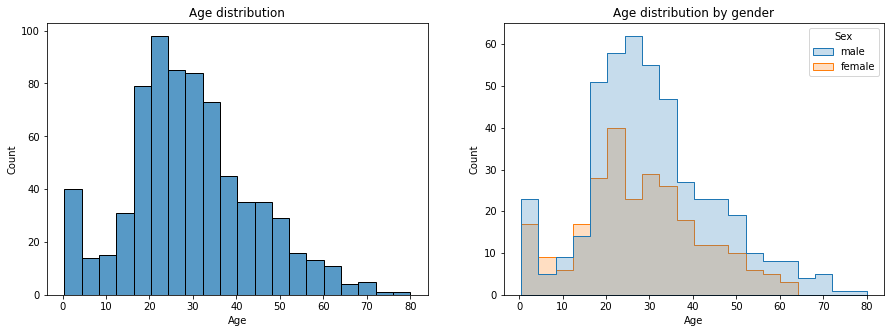

In [13]:
# Plotting number of survivors by Pclass, sex and place of boarding

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))

sns.histplot(x="Age", data=df_train, ax=ax1)
ax1.set_title("Age distribution")

sns.histplot(x="Age", hue="Sex", element="step", data=df_train, ax=ax2)
ax2.set_title("Age distribution by gender")

Text(0.5, 0, 'Fare (pounds)')

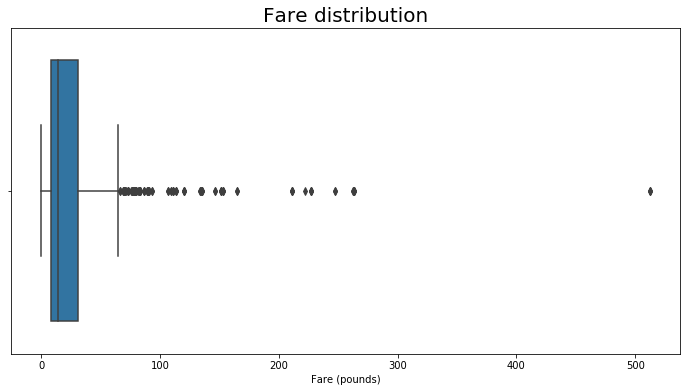

In [14]:
# Plotting the fare distribution

plt.figure(figsize=(12,6))
ax = sns.boxplot(x="Fare", data=df_train)
ax.set_title("Fare distribution", fontsize=20)
ax.set_xlabel("Fare (pounds)")

In [15]:
df_train[df_train["Fare"] > 200].sort_values(by=["Fare"], ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C


In [16]:
# Creating new column called "Relatives" as the sum of sibilings and parents

df_train["Relatives"] = df_train["SibSp"] + df_train["Parch"]

Text(0.5, 0, 'Number of relatives')

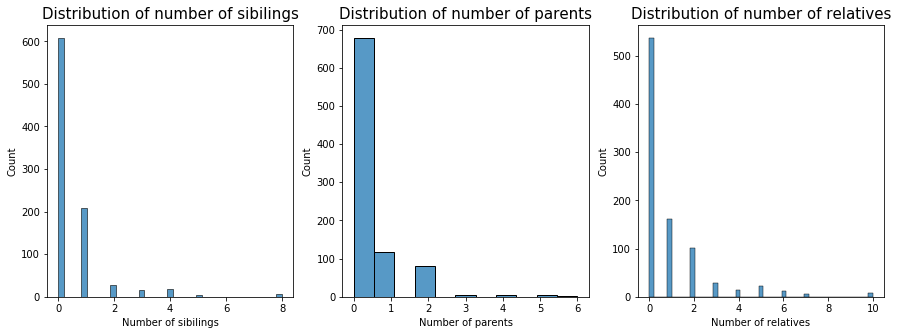

In [17]:
# Plotting the number of sibilings, parents, and relatives

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5))

sns.histplot(x="SibSp", data=df_train, ax=ax1)
ax1.set_title("Distribution of number of sibilings", fontsize=15)
ax1.set_xlabel("Number of sibilings")

sns.histplot(x="Parch", data=df_train, ax=ax2)
ax2.set_title("Distribution of number of parents", fontsize=15)
ax2.set_xlabel("Number of parents")

sns.histplot(x="Relatives", data=df_train, ax=ax3)
ax3.set_title("Distribution of number of relatives", fontsize=15)
ax3.set_xlabel("Number of relatives")

Here, we can draw a few conclusions:

1. around 40% of total passengers survived due to the lack of lifeboat;
2. most of the survivors are female;
3. the higher percentage of survivors came from class 1, which was the most expensive class;
4. the age distribution is similar for both genders. The majority of the passengers were young and their mode is around 25 years old;
5. There are some fare high values, over £ 200 because multiple tickets were bought at the same time for more than one cabin for, some of them, with a high number of relatives traveling together.
6. Most of the passengers are traveling alone or with a low number of relatives, mostly 1 or 2.

# Predictive models

## Decision tree

Decision trees are tree-like algorithms with several leaves (or nodes) making decisions based on one feature of our dataset at a time creating two branches after each node. This process continues until the algorithm ends up with pure leaves, i.e., all the data in that node belongs to a single class. In the end, the algorithm creates a flowchart with all the decisions and features used in each node.

The algorithm selects the best feature for the nodes using criteria such as the Gini index, log loss, and entropy. For classification, the most used is Gini (G) which is given by:

$G = \sum_{k=1}^{k} p_{k}(1-p_{k})$, where k is the number of classes, $p_{k}$ is the probability of one item into a node to belong to class k. On the other hand, the most common criteria for regression is the residual sum of squares (RSS), and it is given by:

$RSS = \sum_{i=1} (Y_{i}-\hat{Y_{i}})$, where $Y_{i}$ is the probability of an item belonging to a class and $\hat{Y_{i}}$ is the mean probability of all item in the node to belong to a class. In both cases, the algorithm will pick the features in descending order until all the features are used once and only once or when the Gini index is increased by some feature. When one of these two scenarios happens, the tree stops growing.

We can stop the algorithm from setting the minimum number of items into a leaf or limiting its depth because the deeper the tree gets, the harder it is to interpret the model itself, and the chances of overfitting increase. 

Now, let's build the model. Since age is an important feature of our predictive model and there are 1/4 of our rows without age, we need to fill those NAN with the median.

In [18]:
# Filling empty value with median age and dropping null values for embarked feature

df_train["Age"] = df_train["Age"].fillna((df_train["Age"].median()))
df_train["Embarked"].dropna(inplace=True)

Since we are dealing with a classification problem, i.e. did survive or did not survive, we are going to use a decision tree first and then the random forest algorithms and then compare both and check the need for boosting. Since the data is not perfectly balanced, it is far away from being unbalanced, thus we do not need to perform a stratified shuffle split but we need to transform some features into numerical ones using the get_dummies method and standardize the dataset to avoid bias.

In [19]:
# Convert categorical variable into dummy/indicator variables and dropping unnecessary features

X_train = pd.get_dummies(df_train, columns = ["Sex", "Embarked", "Pclass"])
X_train = X_train.drop(["Survived", "Name", "Ticket", "Cabin"], axis=1).values
y_train = df_train["Survived"].values

In [20]:
# Standardizing the dataset

X_train  = StandardScaler().fit(X_train).transform(X_train)

In [21]:
# Splitting into the train's train and test set

X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size = 0.25)

In [22]:
# Running the model

decision_tree = tree.DecisionTreeClassifier()
y_pred_decision_tree = run_model(decision_tree, X_train_train, X_train_test, y_train_train)

Accuracy score:  0.7354260089686099
Precision score:  0.6082474226804123
Recall score:  0.7375
Confusion matrix, without normalization
[[ 59  21]
 [ 38 105]]


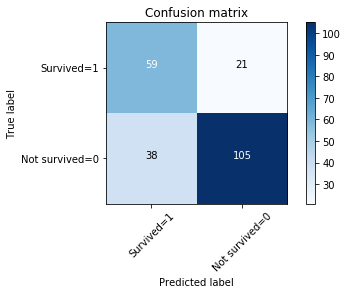

In [24]:
# Displaying the model's score

validation_scores(y_train_test, y_pred_decision_tree)

# Computing confusion matrix

cnf_matrix = confusion_matrix(y_train_test, y_pred_decision_tree, labels=[1,0])
np.set_printoptions(precision=2)

# Plot the confusion matrix for decision tree
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived=1', 'Not survived=0'],normalize= False,  title='Confusion matrix')
plt.show()

In [25]:
# Running the model

decision_tree = tree.DecisionTreeClassifier()
y_pred_decision_tree = run_model(decision_tree, X_train_train, X_train_test, y_train_train)

In [26]:
# Printing the tree max depth

print(decision_tree.get_depth())

18


In [27]:
# Running the model limiting the max depth of 10 and 5

decision_tree = tree.DecisionTreeClassifier(max_depth=10)
y_pred_decision_tree_10 = run_model(decision_tree, X_train_train, X_train_test, y_train_train)

decision_tree = tree.DecisionTreeClassifier(max_depth=5)
y_pred_decision_tree_5 = run_model(decision_tree, X_train_train, X_train_test, y_train_train)

Accuracy score:  0.7488789237668162
Precision score:  0.6395348837209303
Recall score:  0.6875
Confusion matrix, without normalization
[[ 55  25]
 [ 31 112]]


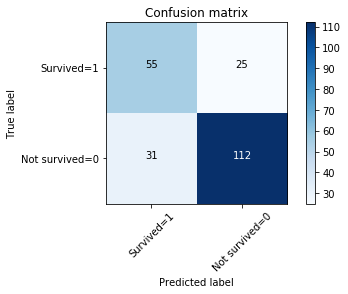

In [28]:
# Displaying the model's score

validation_scores(y_train_test, y_pred_decision_tree_10)

# Computing confusion matrix

cnf_matrix = confusion_matrix(y_train_test, y_pred_decision_tree_10, labels=[1,0])
np.set_printoptions(precision=2)

# Plot the confusion matrix for decision tree
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived=1', 'Not survived=0'],normalize= False,  title='Confusion matrix')
plt.show()

Accuracy score:  0.8026905829596412
Precision score:  0.7903225806451613
Recall score:  0.6125
Confusion matrix, without normalization
[[ 49  31]
 [ 13 130]]


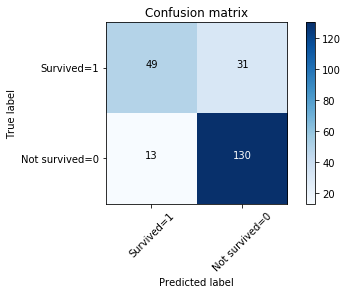

In [29]:
# Displaying the model's score

validation_scores(y_train_test, y_pred_decision_tree_5)

# Computing confusion matrix

cnf_matrix = confusion_matrix(y_train_test, y_pred_decision_tree_5, labels=[1,0])
np.set_printoptions(precision=2)

# Plot the confusion matrix for decision tree
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived=1', 'Not survived=0'],normalize= False,  title='Confusion matrix')
plt.show()

The best model so far is the decision with a max depth of 5. Its results were ok but not excellent. The confusion matrices confirm that and give us the number of false positives (passengers who have falsely labeled as survivors) and false negatives (passengers who have falsely labeled as not survivors). This was expected since decision trees are very simple models and to increase the model's performance, we need to use ensemble techniques such as random forest and boosting.

## Random forest

Random forest is a bagging ensemble learning technique. Bagging stands for *bootstrapping aggregating* which is a population resampling, in a way that the main characteristics are maintained and they have to be independent of each other. Then it will create a model using each of these subsamples and then aggregate all the outcomes in one metric (sum, mean, etc).

Randon forest creates several estimators, i.e. simple decision trees, using subsamples of the original data and some, not all, features to train the algorithm. Those records not used in a determined decision tree (out-of-bag data) will be labeled as True or False in this case. After all the algorithms are finished, the outcome of all records will be set as the most "voted" individual outcome of all algorithms. 

Let's build a random forest model with 50, 100 and 200 estimators.

In [30]:
# Running random forest model

random_forest = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=5)
y_pred_random_forest_100 = run_model(random_forest, X_train_train, X_train_test, y_train_train)

random_forest = RandomForestClassifier(n_estimators=50, random_state=0, max_depth=5)
y_pred_random_forest_50 = run_model(random_forest, X_train_train, X_train_test, y_train_train)

random_forest = RandomForestClassifier(n_estimators=200, random_state=0, max_depth=5)
y_pred_random_forest_200 = run_model(random_forest, X_train_train, X_train_test, y_train_train)

Accuracy score:  0.8251121076233184
Precision score:  0.8360655737704918
Recall score:  0.6375
Confusion matrix, without normalization
[[ 51  29]
 [ 10 133]]


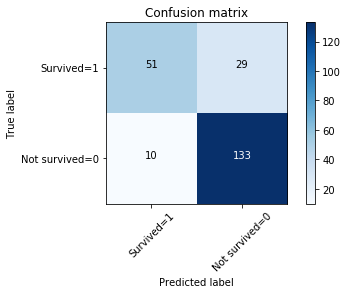

In [31]:
# Displaying the model's score

validation_scores(y_train_test, y_pred_random_forest_100)

# Computing confusion matrix

cnf_matrix = confusion_matrix(y_train_test, y_pred_random_forest_100, labels=[1,0])
np.set_printoptions(precision=2)

# Plot the confusion matrix for decision tree
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived=1', 'Not survived=0'],normalize= False,  title='Confusion matrix')
plt.show()

Accuracy score:  0.8385650224215246
Precision score:  0.84375
Recall score:  0.675
Confusion matrix, without normalization
[[ 54  26]
 [ 10 133]]


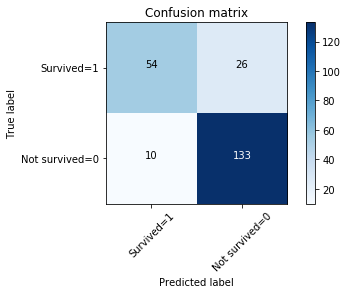

In [32]:
# Displaying the model's score

validation_scores(y_train_test, y_pred_random_forest_200)

# Computing confusion matrix

cnf_matrix = confusion_matrix(y_train_test, y_pred_random_forest_200, labels=[1,0])
np.set_printoptions(precision=2)

# Plot the confusion matrix for decision tree
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived=1', 'Not survived=0'],normalize= False,  title='Confusion matrix')
plt.show()

Accuracy score:  0.8251121076233184
Precision score:  0.8360655737704918
Recall score:  0.6375
Confusion matrix, without normalization
[[ 51  29]
 [ 10 133]]


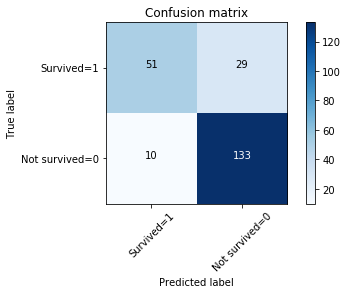

In [33]:
# Displaying the model's score

validation_scores(y_train_test, y_pred_random_forest_50)

# Computing confusion matrix

cnf_matrix = confusion_matrix(y_train_test, y_pred_random_forest_50, labels=[1,0])
np.set_printoptions(precision=2)

# Plot the confusion matrix for decision tree
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived=1', 'Not survived=0'],normalize= False,  title='Confusion matrix')
plt.show()

For random forest models with a max depth of 5 and setting the number of estimators of 50, 100, and 200, their scores are very similar and did not differ too much from the single decision tree. Among these last three algorithms, the best one so far is the random forest with 100 estimators (it is faster to run than the one with 200 estimators despite both having equal scores).

Let's try out the boosting technique and see if it performs better than the previous models. 

# Ensemble learning: boosting

Unlike bagging, boosting tecnique creates dependent and sequential models. One of the most famous boosting algorithms is AdaBoost, i.e. adaptative boosting. Every following model will correct the mistakes in the previous model and so on. That's why we call it adaptative.  

But how does this AdaBoost work?

1. The algorithm will label every record in our dataset with equal weights (1/total number of records). Then, it builds simple decision trees based on only one dataset feature at a time with all rows.  

2. The algorithm choose randomly a tree and it calculates its influence over the other decision trees using the following formula: $\alpha = \frac{1}{2}log(\frac{1 - error}{error})$, where error is calculated by: $error = \frac{\text{records wrongly labeled}}{\text{all the records}}$. $\alpha$ can assume positives and negatives values but the larger the number is, the more influence in the following tree our decision tree will have.

3. Change the original weight of every record, using the following formula: $w_{i} = w_{i-1}*e^{\pm \alpha}$, where $w_{i}$ is the new record weigth and $w_{i-1}$ is the previous record weigth. When the record is wrongly labeled, it uses the + because we need to improve its weight in order to correct the label in the next iteration. Otherwise, i.e. when the record is correctly labeled, then we use the - because this records is already done and the algorithm need to focus on the wrong ones. 

4. Set the interval by adding the weight of a record and the following record. Then, the algorithm will pick n random number between 0 and the sum of the last row's weight, creating a new dataset with its original number of rows. This dataset may contain duplicated records. 

5. Set equal weights again in the new dataset and then start the process all over again. 

Now let's intatiate our model. 

In [34]:
# Running AdaBoost model with 50, 100 and 200 estimators

adaboost = AdaBoostClassifier(random_state=0)
y_pred_adaboost = run_model(adaboost, X_train_train, X_train_test, y_train_train)

adaboost = AdaBoostClassifier(random_state=0, n_estimators=100)
y_pred_adaboost_100 = run_model(adaboost, X_train_train, X_train_test, y_train_train)

adaboost = AdaBoostClassifier(random_state=0, n_estimators=200)
y_pred_adaboost_200 = run_model(adaboost, X_train_train, X_train_test, y_train_train)

Accuracy score:  0.820627802690583
Precision score:  0.7439024390243902
Recall score:  0.7625
Confusion matrix, without normalization
[[ 61  19]
 [ 21 122]]


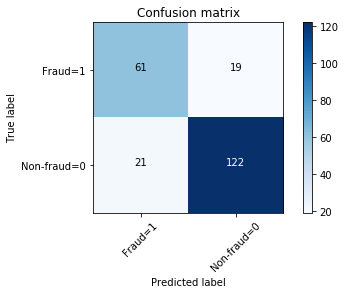

In [35]:
# Displaying the model's score for adaboost 

validation_scores(y_train_test, y_pred_adaboost)

# Computing confusion matrix

cnf_matrix = confusion_matrix(y_train_test, y_pred_adaboost, labels=[1,0])
np.set_printoptions(precision=2)

# Plot the confusion matrix for decision tree
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud=1', 'Non-fraud=0'],normalize= False,  title='Confusion matrix')
plt.show()

Accuracy score:  0.8071748878923767
Precision score:  0.7176470588235294
Recall score:  0.7625
Confusion matrix, without normalization
[[ 61  19]
 [ 24 119]]


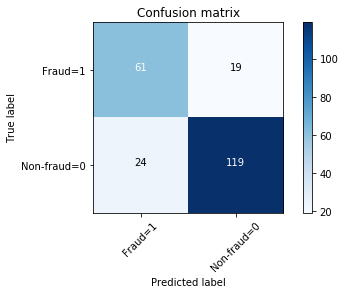

In [36]:
# Displaying the model's score for adaboost 

validation_scores(y_train_test, y_pred_adaboost_100)

# Computing confusion matrix

cnf_matrix = confusion_matrix(y_train_test, y_pred_adaboost_100, labels=[1,0])
np.set_printoptions(precision=2)

# Plot the confusion matrix for decision tree
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud=1', 'Non-fraud=0'],normalize= False,  title='Confusion matrix')
plt.show()

Accuracy score:  0.7892376681614349
Precision score:  0.6896551724137931
Recall score:  0.75
Confusion matrix, without normalization
[[ 60  20]
 [ 27 116]]


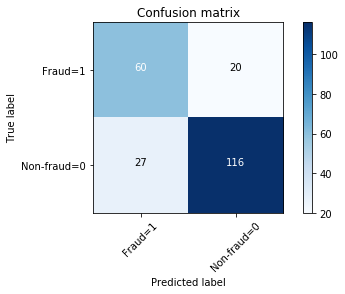

In [37]:
# Displaying the model's score for adaboost 

validation_scores(y_train_test, y_pred_adaboost_200)

# Computing confusion matrix

cnf_matrix = confusion_matrix(y_train_test, y_pred_adaboost_200, labels=[1,0])
np.set_printoptions(precision=2)

# Plot the confusion matrix for decision tree
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud=1', 'Non-fraud=0'],normalize= False,  title='Confusion matrix')
plt.show()

All the AdaBoost models have worst scores than the random forests ones. Let's check the score compilation

|MODEL|PRECISION|RECALL|
|-----|---------|------|
|Decision tree|0.687|0.667|
|Decision tree max depth of 10|0.706|0.606|
|Decision tree max depth of 5|0.710|0.667|
|Random forest 200 estimators & max depth of 5|0.759|0.697|
|**Random forest 100 estimators & max depth of 5**|**0.761**|**0.677**|
|Random forest 50 estimators & max depth of 5|0.775|0.697|
|AdaBoost 50 estimators|0.736|0.727|
|AdaBoost 100 estimators|0.727|0.727|
|AdaBoost 200 estimators|0.737|0.707|

* The values may vary slightly from run to run.

After testing several classification models, the best one is the random forest with a max depth of 5 and 50 estimators. Since the algorithm with 100 estimators has a similar score and is more robust, we will select this one instead.

# Prediction

This prediction will be sent to the Titanic - Machine Learning from Disaster competition.

In [38]:
# Doing the necessary transformations for the test set

df_test["Relatives"] = df_test["SibSp"] + df_test["Parch"]
X_test = pd.get_dummies(df_test, columns = ["Sex", "Embarked", "Pclass"])
X_test = X_test.drop(["Name", "Ticket", "Cabin"], axis=1).values

In [39]:
# Standardizing the dataset

X_test  = StandardScaler().fit(X_test).transform(X_test)

In [40]:
# Running final model

final_model = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=5)
y_pred = run_model(final_model, X_train, X_test, y_train)

In [41]:
# Concatening the model outcomes and the respective passenger id

upload=df_test[["PassengerId"]]
upload["Survived"] = y_pred

C:\Users\steph\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
